## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_first = pd.read_csv("사교육비조사 (1).csv", encoding="cp949")
df_first.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [176]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [177]:
df_first.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [178]:
df = df_first[df_first['학교급구분코드'] == 3]

In [179]:
df.shape

(30052, 17)

2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [180]:
df = df.drop(['지역구분코드', '행정구역시도코드'], axis=1)
df.shape

(30052, 15)

2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [181]:
df['방과후학교참여여부'] .value_counts()

방과후학교참여여부
1    18498
2    11554
Name: count, dtype: int64

In [182]:
df = pd.get_dummies(df, columns = ['방과후학교참여여부'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30052 entries, 4920 to 75682
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   학교급구분코드       30052 non-null  int64  
 1   방과후학교참여시간수    30052 non-null  float64
 2   EBS교재비        30052 non-null  float64
 3   사교육참여시간수      30052 non-null  float64
 4   일반교과사교육시간수    30052 non-null  float64
 5   예체능사교육시간수     30052 non-null  float64
 6   사교육비총비용       30052 non-null  float64
 7   총자녀수          30052 non-null  int64  
 8   학생성적구분코드      30052 non-null  float64
 9   부_교육정도코드      28483 non-null  float64
 10  모_교육정도코드      29074 non-null  float64
 11  부모경제활동코드      29947 non-null  float64
 12  월평균가구소득코드     30052 non-null  int64  
 13  진학희망고등학교유형코드  0 non-null      float64
 14  방과후학교참여여부_1   30052 non-null  bool   
 15  방과후학교참여여부_2   30052 non-null  bool   
dtypes: bool(2), float64(11), int64(3)
memory usage: 3.5 MB


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [183]:
df.drop(columns = ['EBS교재비'], axis=1, inplace=True)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30052 entries, 4920 to 75682
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   학교급구분코드       30052 non-null  int64  
 1   방과후학교참여시간수    30052 non-null  float64
 2   사교육참여시간수      30052 non-null  float64
 3   일반교과사교육시간수    30052 non-null  float64
 4   예체능사교육시간수     30052 non-null  float64
 5   사교육비총비용       30052 non-null  float64
 6   총자녀수          30052 non-null  int64  
 7   학생성적구분코드      30052 non-null  float64
 8   부_교육정도코드      28483 non-null  float64
 9   모_교육정도코드      29074 non-null  float64
 10  부모경제활동코드      29947 non-null  float64
 11  월평균가구소득코드     30052 non-null  int64  
 12  진학희망고등학교유형코드  0 non-null      float64
 13  방과후학교참여여부_1   30052 non-null  bool   
 14  방과후학교참여여부_2   30052 non-null  bool   
dtypes: bool(2), float64(10), int64(3)
memory usage: 3.3 MB


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

<Axes: xlabel='학생성적구분코드', ylabel='사교육비총비용'>

/home/dinoboy22/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/home/dinoboy22/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/home/dinoboy22/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/home/dinoboy22/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  func(*args, **kwargs)
/home/dinoboy22/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/home/dinoboy22/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning:

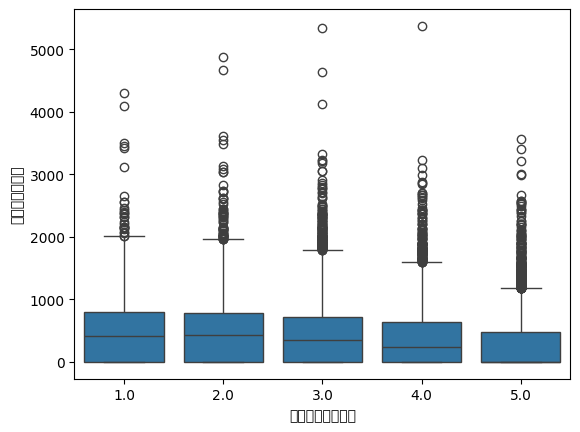

In [185]:
import seaborn as sns
sns.boxplot(x='학생성적구분코드', y='사교육비총비용', data=df)

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [186]:
df.reset_index(inplace=True)
temp = df['학생성적구분코드'].values
df['학생성적구분코드'] = np.where(temp<3, 'A', np.where(temp>3, 'C', 'B'))
df = pd.get_dummies(df, columns = ['학생성적구분코드'])
df


,index,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부_1,방과후학교참여여부_2,학생성적구분코드_A,학생성적구분코드_B,학생성적구분코드_C
0,4920,3,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,True,False,True,False,False
1,4921,3,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,True,False,False,True,False
2,4922,3,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,True,False,False,False,True
3,4923,3,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,True,False,False,False,True
4,4924,3,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30047,75678,3,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,False,True,False,False,True
30048,75679,3,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,False,True,False,False,True
30049,75680,3,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,False,True,False,False,True
30050,75681,3,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,False,True,True,False,False


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: Label Encoding은 n개의 범주형 데이터를 연속적인 수치 데이터로 표현하는 것인데, 이런 수치 데이터의 차이가 통계적인 의미를 갖지는 않는다. 단순히 문자열 값을 숫자형 값으로 변환해주는 것일 뿐이다. 
One Hot Encoding은 row별로 각각의 column을 추가해 해당되면 1, 그렇지 않으면 0으로 표시를 하는 기법이다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [187]:
#dummy variable을 생성하는 함수 내부에서 자체적으로 원본 column 삭제함

2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A: 다중공선성 문제란 회귀 분석에서 사용된 모형에서 어떤 독립 변수가 다른 독립 변수들과 완벽한 선형 독립이 아닌 경우 발생하는 문제를 뜻한다. 

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

/home/dinoboy22/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/home/dinoboy22/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.draw()
/home/dinoboy22/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.draw()
/home/dinoboy22/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.draw()
/home/dinoboy22/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
/home/dinoboy22/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current fo

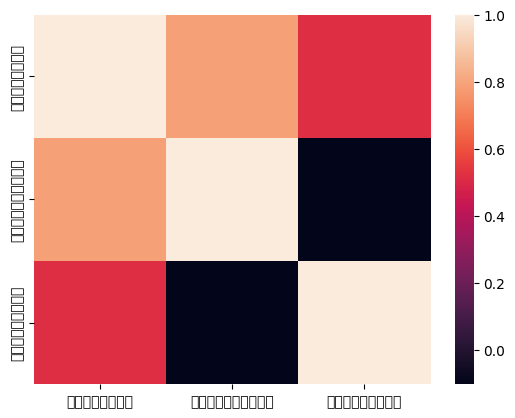

In [192]:
df_temp = df[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']]
df1 = df_temp.corr()
sns.heatmap(df1)
plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [ ]:
#아직 모델 생성 및 시험 과정을 스터디중입니다.

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [ ]:
#아직 모델 생성 및 시험 과정을 스터디중입니다.